# Install required packages

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import transformers


/Users/carstenschnober/opt/anaconda3/envs/SoS/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [3]:
from pathlib import Path


DATA_DIR = Path.home() / "Documents" / "SemanticsOfSustainability" / "data" / "Joris"
assert DATA_DIR.is_dir()


In [4]:
import logging
from pandas._libs.tslibs.timestamps import Timestamp


def to_decade(date) -> str:
    if isinstance(date, Timestamp):
        return to_decade(date.year)
    elif isinstance(date, int):
        start = int(date / 10) * 10
        return f"{start} - {start+9}"
    elif isinstance(date, str):
        try:
            return to_decade(pd.to_datetime(date))
        except Exception as e:
            logging.error(f"Failed to parse date '{date}': {str(e)}")
            # Try to extract year only
            return to_decade(date[:4])
    else:
        raise RuntimeError(f"Invalid date: '{date}'")


def date_to_string(dt) -> str:
    if isinstance(dt, Timestamp):
        return str(dt.date())
    elif isinstance(dt, str):
        return dt
    else:
        raise RuntimeError(f"Invalid date: '{dt}'")


## ANP

In [5]:
ANP_DIR = DATA_DIR / "ANP" / "CleanFiles_perYear"
assert ANP_DIR.is_dir()


In [6]:
from tqdm import tqdm


FILE_GLOB = "ANP_19[0-9][0-9].csv.gz"
ENCODING = "iso8859_15"

anp = pd.concat(
    tqdm(
        (
            pd.read_csv(
                f, compression="gzip", sep=";", encoding=ENCODING, parse_dates=["date"]
            ).dropna(subset="content")
            for f in ANP_DIR.glob(FILE_GLOB)
        ),
        total=len(list(ANP_DIR.glob(FILE_GLOB))),
        unit="file",
        desc="Reading",
    ),
    ignore_index=True,
).convert_dtypes()
anp["decade"] = anp["year"].apply(to_decade)


anp


Reading: 100%|██████████| 48/48 [00:16<00:00,  2.99file/s]


,filename,content,date,year,month,day,issue,decade
0,anp_1952_01_01_10_ocr.xml,Red.: Datum: veldman 1-1-52 Tijd: 13 ttt^....,1952-01-01,1952,1,1,10,1950 - 1959
1,anp_1952_01_01_11_ocr.xml,Red. Datum: Tijd: Onderwerp: veltmeijer 1...,1952-01-01,1952,1,1,11,1950 - 1959
2,anp_1952_01_01_12_ocr.xml,/3* Red. Datum: Tijd: Onderwerp: veltmei...,1952-01-01,1952,1,1,12,1950 - 1959
3,anp_1952_01_01_13_ocr.xml,Red.: Datum: Tijd: Onderwerp: veltmeijer ...,1952-01-01,1952,1,1,13,1950 - 1959
4,anp_1952_01_01_14_ocr.xml,Red.: Datum: Tijd: Onderwerp: mallon 1-1-...,1952-01-01,1952,1,1,14,1950 - 1959
...,...,...,...,...,...,...,...,...
1474644,anp_1973_12_31_96_ocr.xml,Red.: Datum: Tijd: Onderwerp: kreek 31. 12. 7...,1973-12-31,1973,12,31,96,1970 - 1979
1474645,anp_1973_12_31_97_ocr.xml,Red.: Datum: Tijd: Onderwerp: kuy 31-12-...,1973-12-31,1973,12,31,97,1970 - 1979
1474646,anp_1973_12_31_98_ocr.xml,Red. Datum: Tijd: Onderwerp: kreek 31. 12...,1973-12-31,1973,12,31,98,1970 - 1979
1474647,anp_1973_12_31_99_ocr.xml,Red. Datum: Tijd: Onderwerp: zijl 31-12-...,1973-12-31,1973,12,31,99,1970 - 1979


Text(0, 0.5, 'Number of Documents')

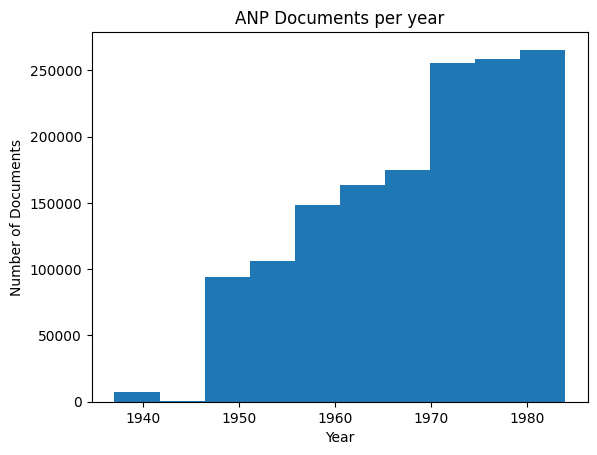

In [7]:
plt.hist(anp.year, label="Year")
plt.title("ANP Documents per year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0.5, 0, 'Number of Characters')

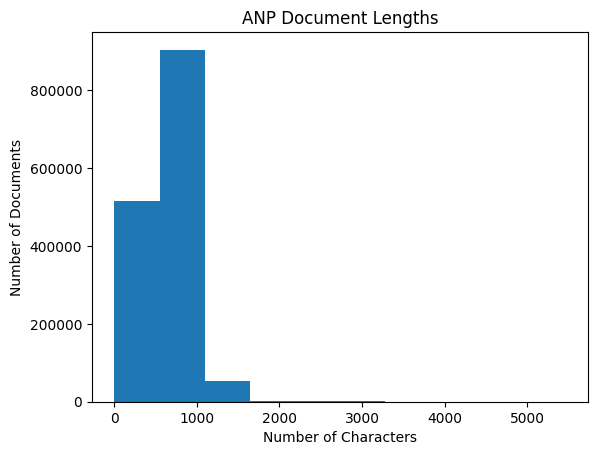

In [8]:
plt.hist(anp.content.str.len())
plt.title("ANP Document Lengths")
plt.ylabel("Number of Documents")
plt.xlabel("Number of Characters")


## StatenGeneraal

In [9]:
SG_DIR = DATA_DIR / "StatenGeneraal"

assert SG_DIR.is_dir()

SG_GLOB = "StatenGeneraal_[12][890][0-9][0-9].csv.gz"

In [10]:
from tqdm import tqdm

ENCODING = "iso8859_15"


staten_generaal = pd.concat(
    tqdm(
        (
            pd.read_csv(
                f, compression="gzip", sep=";", encoding=ENCODING, parse_dates=["date"]
            ).dropna(subset="Content")
            for f in SG_DIR.glob(SG_GLOB)
        ),
        total=len(list(SG_DIR.glob(SG_GLOB))),
        unit="file",
        desc="Reading",
    ),
    ignore_index=True,
).convert_dtypes()

staten_generaal


Reading: 100%|██████████| 205/205 [01:30<00:00,  2.27file/s]


,Unnamed: 0,date,RecId,title,type,description,year,Content,ocr_link,pages,chamber,leg_period,speakers
0,144302,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Rijksbegroting voor het dienstjaar 1976. Defensie,BRIEF VAN DE MINISTER VAN DEFENSIE,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
1,144303,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Wijziging Liquidatiewet invaliditeitswetten,KONINKLIJKE BOODSCHAP,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
2,144304,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,"Naturalisatie van Bakarbessy, Jacobus Hermanus...",KONINKLIJKE BOODSCHAP,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
3,144305,1976-01-05,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Wijziging van de Kleuteronderwijswet (Stb. 197...,VERSLAG,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3",StatenGeneraal,<NA>,<NA>
4,144306,1976-01-05,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Uitvoering van artikel 15 van de Comptabilitei...,NOTA NAAR AANLEIDING VAN HET VERSLAG,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3",StatenGeneraal,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187141,108,1857-12-02 00:00:00,nl.proc.sgd.d.185718580000114,Handelingen Tweede Kamer 1857-1858 02 december...,Verbatim Proceedings,<NA>,1857,65ste vel. â 227 â Tweede Kamer.ZITTIN G V...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00697: mp, de heer: Kien; nl.m.00473: cha..."
187142,109,1857-12-07 00:00:00,nl.proc.sgd.d.185718580000115,Handelingen Tweede Kamer 1857-1858 07 december...,Verbatim Proceedings,<NA>,1857,G7stc vel. â 235 TV Tweede Kamer.27ste IIfT1...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00855: mp, De heer: baron van Lynden; nl...."
187143,110,1857-12-10 00:00:00,nl.proc.sgd.d.185718580000116,Handelingen Tweede Kamer 1857-1858 10 december...,Verbatim Proceedings,<NA>,1857,68ste vel. 237 â Tweede Kamer.Z1TITN G VAN D...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.02118: government, minister: Vrolik; nl.m..."
187144,111,1857-12-11 00:00:00,nl.proc.sgd.d.185718580000117,Handelingen Tweede Kamer 1857-1858 11 december...,Verbatim Proceedings,<NA>,1857,73ste vel. â 255 â Tweede Kamer.LXf. liuit...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00918: mp, De heer: Meijlink; nl.m.01557:..."


Text(0, 0.5, 'Number of Documents')

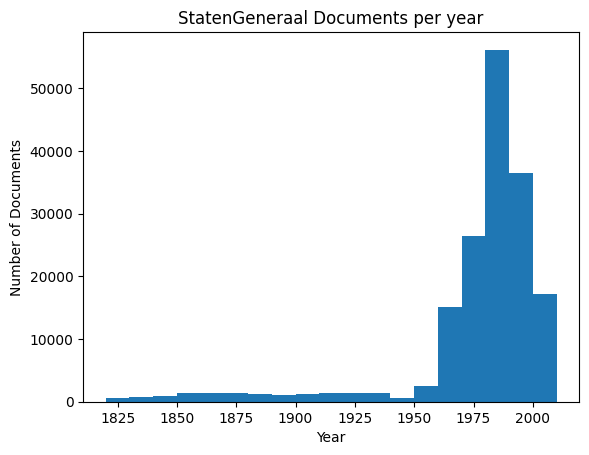

In [11]:
plt.hist(staten_generaal.year, label="Year", bins=range(1820, 2020, 10))
plt.title("StatenGeneraal Documents per year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0.5, 0, 'Number of Characters')

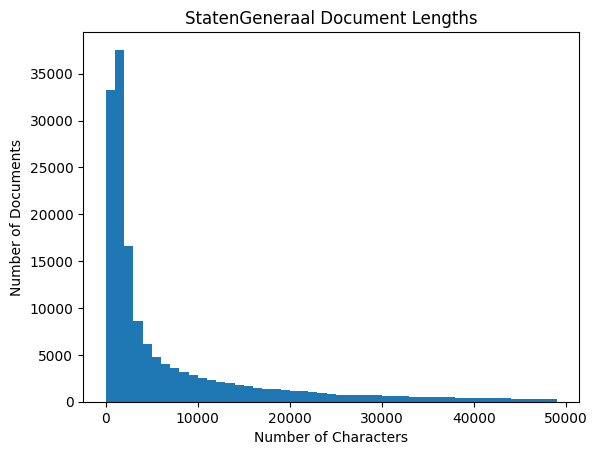

In [12]:
plt.hist(staten_generaal.Content.str.len(), bins=range(0, 50000, 1000))
plt.title("StatenGeneraal Document Lengths")
plt.ylabel("Number of Documents")
plt.xlabel("Number of Characters")


## Newspapers (Delpher)

In [13]:
DELPHER_DIR = DATA_DIR / "Delpher" / "RawFiles"

assert DELPHER_DIR.is_dir()

### Volkskrant

In [14]:
VOLKSKRANT_DIR = DELPHER_DIR / "Volkskrant"

assert VOLKSKRANT_DIR.is_dir()

In [15]:
VOLKSKRANT_GLOB = "Volkskrant_1[0-9][0-9][0-9].csv.gz"

volkskrant = pd.concat(
    tqdm(
        (
            pd.read_csv(
                f, compression="gzip", sep=";", encoding=ENCODING, parse_dates=["date"]
            ).dropna(subset="Content")
            for f in VOLKSKRANT_DIR.glob(VOLKSKRANT_GLOB)
        ),
        total=len(list(VOLKSKRANT_DIR.glob(VOLKSKRANT_GLOB))),
        unit="file",
        desc="Reading Volkskrant",
    )
).convert_dtypes()

volkskrant


Reading Volkskrant: 100%|██████████| 77/77 [02:09<00:00,  1.69s/file]


,Unnamed: 0,Content,RecId,article_tit,date,genre,month,newspaper,year
0,0,TWEE AMERIKANEN MOETEN GIJZELINGSDRAMA MET DOO...,ddd:010879303:mpeg21:a0001,<NA>,1984-12-10,artikel,12,Volkskrant,1984
1,1,RSV-top reageert voorlopig niet op enquÃªterap...,ddd:010879303:mpeg21:a0002,<NA>,1984-12-10,artikel,12,Volkskrant,1984
2,2,Goedkope boter ook net Pasen te koop Jttj-VERS...,ddd:010879303:mpeg21:a0003,<NA>,1984-12-10,artikel,12,Volkskrant,1984
3,3,Rotterdam krijgt kabelkrant OTTERDAM â De Av...,ddd:010879303:mpeg21:a0004,<NA>,1984-12-10,artikel,12,Volkskrant,1984
4,4,Is Gijs wijs? 'le Qt betekent het dat de reger...,ddd:010879303:mpeg21:a0005,<NA>,1984-12-10,artikel,12,Volkskrant,1984
...,...,...,...,...,...,...,...,...,...
84950,84950,KEERZIJDE Bord Tandakken naar de beelden van N...,ddd:010879915:mpeg21:a0208,<NA>,1981-08-31,artikel,8,Volkskrant,1981
84951,84951,"Volk Het volk betaalt belasting, mede om het b...",ddd:010879915:mpeg21:a0209,<NA>,1981-08-31,artikel,8,Volkskrant,1981
84952,84952,Toilet Op het tweejaarlijkse congres van de So...,ddd:010879915:mpeg21:a0210,<NA>,1981-08-31,artikel,8,Volkskrant,1981
84953,84953,Volksmond Van alle sportorganisaties was het k...,ddd:010879915:mpeg21:a0211,<NA>,1981-08-31,artikel,8,Volkskrant,1981


Text(0, 0.5, 'Number of Documents')

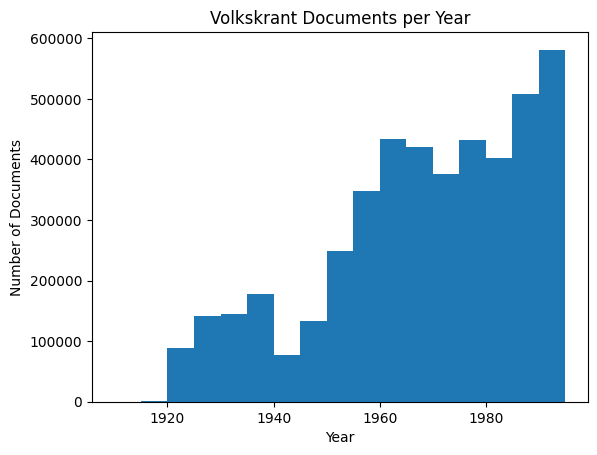

In [16]:
plt.hist(volkskrant.year, label="Year", bins=range(1910, 2000, 5))
plt.title("Volkskrant Documents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")

Text(0.5, 0, 'Number of Characters')

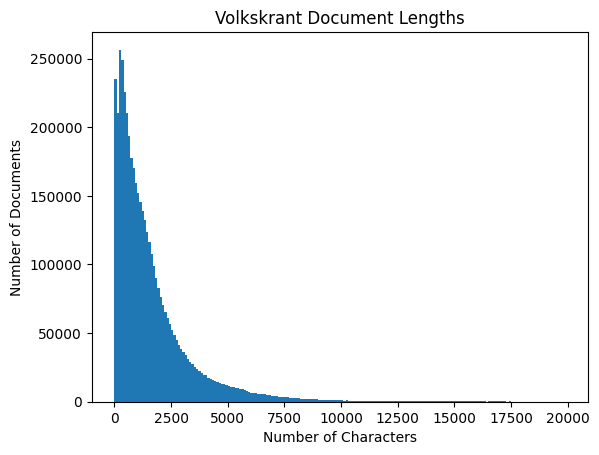

In [17]:
plt.hist(volkskrant.Content.str.len(), bins=range(0, 20000, 100))
plt.title("Volkskrant Document Lengths")
plt.ylabel("Number of Documents")
plt.xlabel("Number of Characters")

# Load Model

In [18]:
MODEL_NAME = "DTAI-KULeuven/robbertje-1-gb-non-shuffled"  # NL MODEL TODO: is the model trained on lowercased data?

MODEL_MAX_LENGTH = 512


In [19]:
from transformers import AutoTokenizer, RobertaModel


tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME, model_max_length=MODEL_MAX_LENGTH, truncation=True
)
model = RobertaModel.from_pretrained(MODEL_NAME)


Some weights of the model checkpoint at DTAI-KULeuven/robbertje-1-gb-non-shuffled were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at DTAI-KULeuven/robbertje-1-gb-non-shuffled and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this mode

# Find Contexts

In [20]:
TERM = "duurzaam"


In [21]:
term_token_ids = tokenizer(TERM)["input_ids"]
print(term_token_ids)

print(tokenizer.convert_ids_to_tokens(term_token_ids))


[0, 6395, 4249, 2]
['<s>', 'duur', 'zaam', '</s>']


## ANP

In [22]:
from src.context import Context

anp_contexts = []

anp_term_rows = anp.loc[anp.content.str.contains(TERM)]

for index, row in tqdm(anp_term_rows.iterrows(), total=len(anp_term_rows), unit="row"):
    anp_contexts.extend(
        Context.contexts(
            row.content,
            TERM,
            MODEL_MAX_LENGTH,
            model,
            tokenizer,
            {"date": row.date, "source": row.filename},
        )
    )

print(f"Rows containing '{TERM}' in ANP: {len(anp_term_rows)}")
print(f"Contexts found for '{TERM}' in ANP: {len(anp_contexts)}")


100%|██████████| 273/273 [00:00<00:00, 1164.89row/s]

Rows containing 'duurzaam' in ANP: 273
Contexts found for 'duurzaam' in ANP: 237


In [23]:
anp_term_rows


,filename,content,date,year,month,day,issue,decade
3108,anp_1952_02_11_46_ocr.xml,Red.: mallon :-:. raa. üx Datum: 11-2-52 T...,1952-11-02,1952,2,11,46,1950 - 1959
15594,anp_1952_07_19_31_ocr.xml,"Red: Kprp, Datum: 19 Juli' 52 Tijd: HOC ...",1952-07-19,1952,7,19,31,1950 - 1959
23851,anp_1952_11_03_25_ocr.xml,Red: mallon Datum: 3-*ll?52 Tijd: Onderwe...,1952-03-11,1952,11,3,25,1950 - 1959
23861,anp_1952_11_03_34_ocr.xml,Red: Datum: Tijd: Onderwerp: m-llon 3-11...,1952-03-11,1952,11,3,34,1950 - 1959
27918,anp_1952_12_29_48_ocr.xml,"Red: Rpmijn Datum: 29 Dec. 52 Tijd: 23, 0...",1952-12-29,1952,12,29,48,1950 - 1959
...,...,...,...,...,...,...,...,...
1444295,anp_1973_06_16_152_ocr.xml,Red.: Datum: Tijd: Onderwerp: .Leeuw... 1...,1973-06-16,1973,6,16,152,1970 - 1979
1444406,anp_1973_06_17_10_ocr.xml,Red.: Datum: Tijd: Onderwerp: duijv . 1....,1973-06-17,1973,6,17,10,1970 - 1979
1444456,anp_1973_06_17_1_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjy 17 6 ...,1973-06-17,1973,6,17,1,1970 - 1979
1444475,anp_1973_06_17_37_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjv 17. ...,1973-06-17,1973,6,17,37,1970 - 1979


Text(0, 0.5, 'Number of Documents')

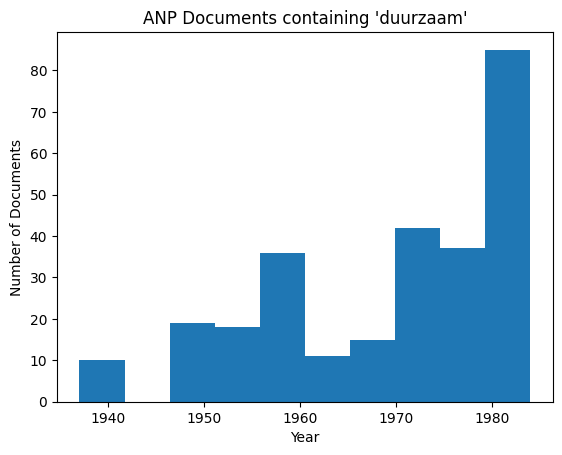

In [24]:
plt.hist(anp_term_rows.year)
plt.title(f"ANP Documents containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

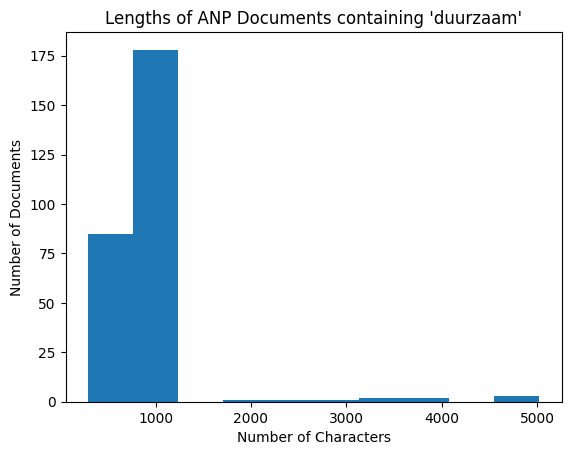

In [25]:
plt.hist(anp_term_rows.content.str.len())
plt.title(f"Lengths of ANP Documents containing '{TERM}'")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")


## Staten Generaal

In [26]:
from tqdm import tqdm

sg_contexts = []
sg_term_rows = staten_generaal.loc[staten_generaal.Content.str.contains(TERM)]

for index, row in tqdm(sg_term_rows.iterrows(), total=len(sg_term_rows), unit="row"):
    sg_contexts.extend(
        Context.contexts(
            row.Content,
            TERM,
            MODEL_MAX_LENGTH,
            model,
            tokenizer,
            {"date": row.date, "source": row.RecId},
        )
    )
print(f"Rows containing '{TERM}' in Staten Generaal: {len(sg_term_rows)}")
print(f"Contexts found for '{TERM}' in Staten Generaal: {len(sg_contexts)}")


100%|██████████| 8498/8498 [00:30<00:00, 277.77row/s]

Rows containing 'duurzaam' in Staten Generaal: 8498
Contexts found for 'duurzaam' in Staten Generaal: 15413


In [27]:
sg_term_rows


,Unnamed: 0,date,RecId,title,type,description,year,Content,ocr_link,pages,chamber,leg_period,speakers
115,144430,1976-01-23,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Afsluiting Oosterschelde,BRIEF VAN DE MINISTER VAN VERKEER EN WATERSTAAT,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>
155,144471,1976-01-29,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Handelingen,Handelingen Tweede Kamer 1975-1976 29 januari ...,Handelingen Tweede Kamer 1975-1976 29 januari ...,1976,42ste Vergadering Voorzitter: Vondeling Tegenw...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534...",StatenGeneraal,<NA>,<NA>
163,144479,1976-01-30,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Vaststelling van Boek 6 van het nieuwe Burgerl...,MEMORIE VAN ANTWOORD,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>
174,144507,1976-02-03,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Kwantitatieve beperkingen in de olieaanvoer,VERSLAG VAN OPENBARE GESPREKKEN,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>
220,144561,1976-02-10,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Handelingen,Handelingen Tweede Kamer 1975-1976 10 februari...,Handelingen Tweede Kamer 1975-1976 10 februari...,1976,46ste Vergadering Dinsdag 10 februari 1976 Aan...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718...",StatenGeneraal,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187064,31,1857-05-13 00:00:00,nl.proc.sgd.d.185618570000168,Handelingen Tweede Kamer 1856-1857 13 mei 1857...,Verbatim Proceedings,<NA>,1857,212de vel. 773 Tweede Kamer.XCIX. Intrekking v...,<NA>,<NA>,TweedeKamer,1856-1857,"nl.m.00473: chair, voorzitter: baron van Golts..."
187080,47,1857-06-30 00:00:00,nl.proc.sgd.d.185618570000184,Handelingen Tweede Kamer 1856-1857 30 juni 185...,Verbatim Proceedings,<NA>,1857,266ste vel. â 975 â Tweede Kamer.ZITTIN G ...,<NA>,<NA>,TweedeKamer,1856-1857,": mp, De heer: Nolthenlu s; nl.m.00455: mp, De..."
187086,53,1857-07-07 00:00:00,nl.proc.sgd.d.185618570000190,Handelingen Tweede Kamer 1856-1857 07 juli 185...,Verbatim Proceedings,<NA>,1857,290ste vel. 1065 Tweede Kamer.LXXXIV . Lager O...,<NA>,<NA>,TweedeKamer,1856-1857,"nl.m.00473: chair, voorzitter: baron van Golts..."
187112,79,1857-12-23 00:00:00,nl.proc.sgd.d.185718580000052,Handelingen Eerste Kamer 1857-1858 23 december...,Verbatim Proceedings,<NA>,1857,21ste vel. 67 â Eerste Kamer.ZITTIN G VAN DE...,<NA>,<NA>,EersteKamer,1857-1858,"nl.m.01176: mp, De heer: Sassen; : mp, De heer..."


Text(0, 0.5, 'Number of Documents')

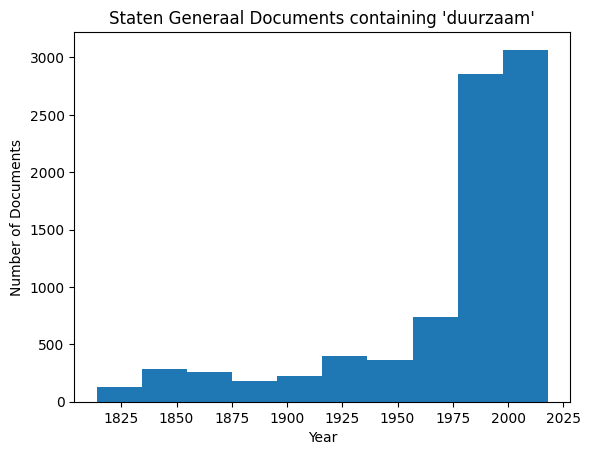

In [28]:
plt.hist(sg_term_rows.year)
plt.title(f"Staten Generaal Documents containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

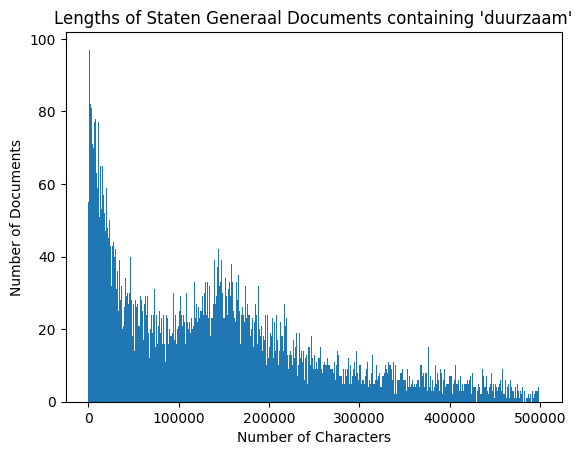

In [29]:
plt.hist(sg_term_rows.Content.str.len(), bins=range(0, 500000, 1000))
plt.title(f"Lengths of Staten Generaal Documents containing '{TERM}'")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")


## Volkskrant

In [30]:
volkskrant_contexts = []
volkskrant_term_rows = volkskrant.loc[volkskrant.Content.str.contains(TERM)]

volkskrant_term_rows

,Unnamed: 0,Content,RecId,article_tit,date,genre,month,newspaper,year
860,860,âNIEUWE WET IS BESTE OPLOSSINGâ Rechtsposi...,ddd:010879306:mpeg21:a0169,<NA>,1984-12-13,artikel,12,Volkskrant,1984
901,901,esbische weduwe moet huis uit Suw Mary Simpson...,ddd:010879306:mpeg21:a0210,<NA>,1984-12-13,artikel,12,Volkskrant,1984
1201,1201,SLOTHOOFDSTUK VAN âDE ZILVEREN KOGELâ IS E...,ddd:010879307:mpeg21:a0247,<NA>,1984-12-14,artikel,12,Volkskrant,1984
1428,1428,"Sport, goed-uitziende slanke man van 31 jr. H....",ddd:010879308:mpeg21:a0192,<NA>,1984-12-15,advertentie,12,Volkskrant,1984
4050,4050,FAMILIEBERICHTEN Het College van Bestuur en he...,ddd:010879315:mpeg21:a0149,<NA>,1984-12-27,familiebericht,12,Volkskrant,1984
...,...,...,...,...,...,...,...,...,...
77107,77107,ALLEEN SCHATKIST PROFITEERT Autovakantie dure ...,ddd:010879881:mpeg21:a0041,<NA>,1981-07-22,artikel,7,Volkskrant,1981
78910,78910,"Kennismaking Gezocht i Het 1.F.C.5.0., het bem...",ddd:010879890:mpeg21:a0083,<NA>,1981-08-01,advertentie,8,Volkskrant,1981
80106,80106,"Kennismaking Gezocht 1 Het 1.F.C.5.0., het bem...",ddd:010879896:mpeg21:a0075,<NA>,1981-08-08,advertentie,8,Volkskrant,1981
81958,81958,Keerpunt Naast deze kritiek op Nelissen willen...,ddd:010879904:mpeg21:a0166,<NA>,1981-08-18,artikel,8,Volkskrant,1981


Text(0, 0.5, 'Number of Documents')

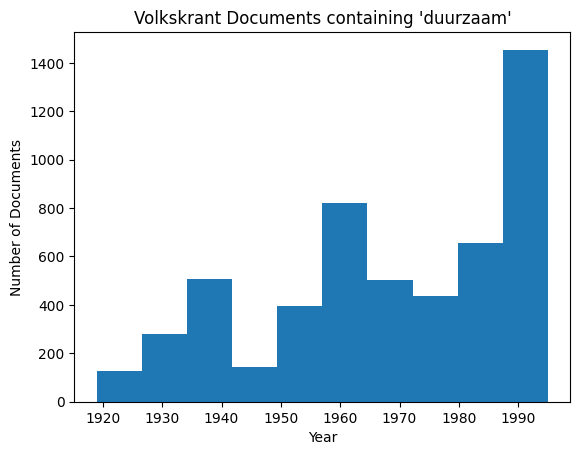

In [31]:
plt.hist(volkskrant_term_rows.year)
plt.title(f"Volkskrant Documents containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

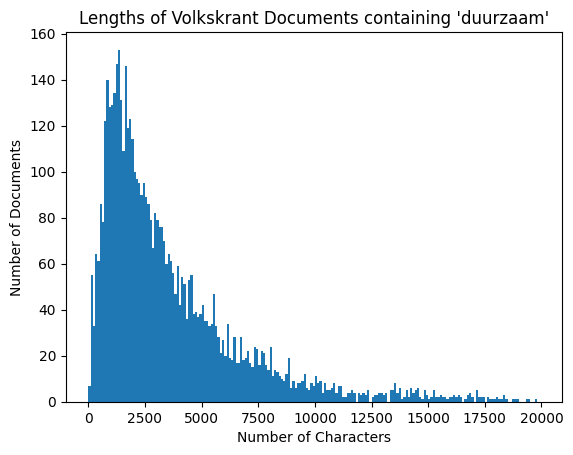

In [32]:
plt.hist(volkskrant_term_rows.Content.str.len(), bins=range(0, 20000, 100))
plt.title(f"Lengths of Volkskrant Documents containing '{TERM}'")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")

In [33]:
for index, row in tqdm(
    volkskrant_term_rows.iterrows(), total=len(volkskrant_term_rows), unit="row"
):
    volkskrant_contexts.extend(
        Context.contexts(
            row.Content,
            TERM,
            MODEL_MAX_LENGTH,
            model,
            tokenizer,
            metadata={"date": row.date, "source": row.RecId},
        )
    )

print(f"Rows containing '{TERM}' in Volkskrant: {len(volkskrant_term_rows)}")
print(f"Contexts found for '{TERM}' in Volkskrant: {len(volkskrant_contexts)}")


100%|██████████| 5322/5322 [00:05<00:00, 965.68row/s] 

Rows containing 'duurzaam' in Volkskrant: 5322
Contexts found for 'duurzaam' in Volkskrant: 3990


## Merge and Sample

In [34]:
from tqdm import tqdm
import random

SAMPLE_SIZE = 5000
RANDOM_SEED = 0

random.seed(RANDOM_SEED)

merged = anp_contexts + sg_contexts + volkskrant_contexts
#merged = volkskrant_contexts


if SAMPLE_SIZE is None or SAMPLE_SIZE > len(merged):
    sample = merged
else:
    sample = random.sample(merged, k=SAMPLE_SIZE)

print(f"Sample size: {len(sample)}")

Sample size: 5000


Text(0, 0.5, 'Number of Occurrences')

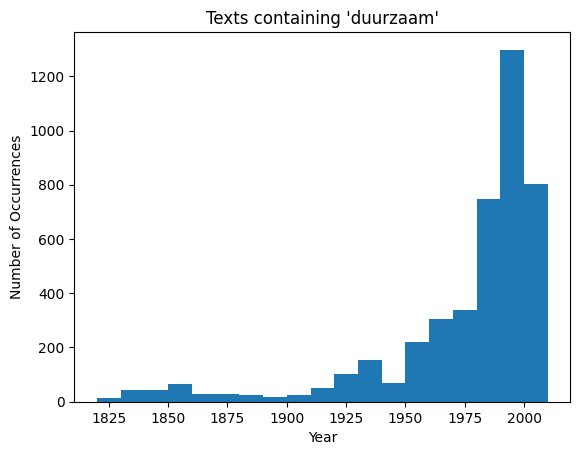

In [35]:
plt.hist(
    [
        pd.to_datetime(_sample.metadata["date"], errors="coerce").year
        for _sample in sample
    ],
    bins=range(1820, 2020, 10),
)
plt.title(f"Texts containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")


# Compute Embeddings

In [36]:
# TODO: use batches for computing embeddings

token_embeddings = np.array(
    [
        context.token_embedding().detach().numpy()
        for context in tqdm(sample, unit="context")
    ]
)

assert token_embeddings.shape == (len(sample), model.config.hidden_size)


100%|██████████| 5000/5000 [22:05<00:00,  3.77context/s]


# Plot

In [37]:
import umap.plot

umap.plot.output_notebook()

title = f"UMAP Embeddings Projections for '{TERM}'"


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Loading BokehJS ...

In [38]:
mapper = umap.UMAP().fit(token_embeddings)


## Static

Text(0.5, 1.0, "UMAP Embeddings Projections for 'duurzaam'")

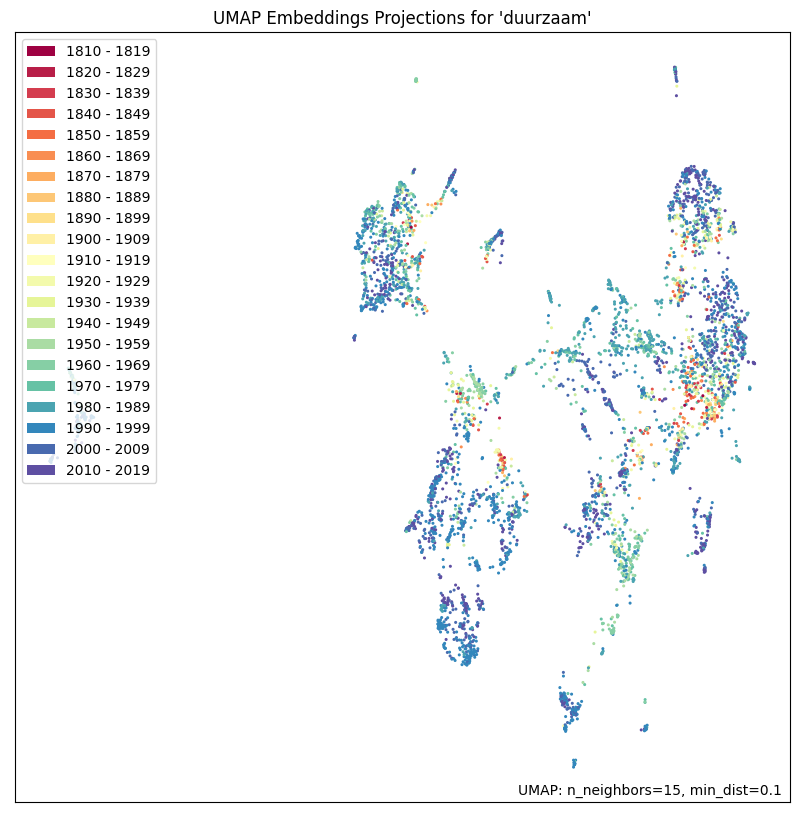

In [39]:
labels = np.array([to_decade(context.metadata["date"]) for context in sample])
subplot = umap.plot.points(
    mapper,
    height=1000,
    width=1000,
    labels=labels
)
subplot.set_title(title)


## Interactive

In [40]:
from bokeh.models import ColumnDataSource

metadatas = pd.DataFrame(
    [
        {
            "x": embedding[0],
            "y": embedding[1],
            "date": date_to_string(context.metadata["date"]),
            "source": context.metadata["source"],
            "decade": label,
            "context": context.text,
        }
        for context, embedding, label in zip(sample, mapper.embedding_, labels)
    ]
)
source = ColumnDataSource(data=metadatas)
metadatas


,x,y,date,source,decade,context
0,16.370667,7.646303,2008-12-16,h-tk-20082009-3295-3349,2000 - 2009,"ische ontwikkeling, en minder armoede en honge..."
1,6.104381,4.634686,1992-01-24,https://services.kb.nl/mdo/oai?verb=GetRecord&...,1990 - 1999,mingen en liquidatie van deelnemingen (code 8)...
2,-8.303603,6.705536,1989-04-07,https://services.kb.nl/mdo/oai?verb=GetRecord&...,1980 - 1989,quo in materiÃ«le zin -Ã©Ã©n van de uitgangsp...
3,4.966969,4.534708,2002-04-23,h-ek-20012002-1322-1363,2000 - 2009,zeker niet genoeg zou zijn. Desondanks hebben...
4,4.082340,9.185998,1928-06-05,https://resolver.kb.nl/resolve?urn=MMKB12:0001...,1920 - 1929,J. P. M. VLEKKE. ROMAN DOOR SCHARLAU ALBERTI. ...
...,...,...,...,...,...,...
4995,6.667072,3.350467,1994-04-27,https://services.kb.nl/mdo/oai?verb=GetRecord&...,1990 - 1999,NCED intentieverklaringen getekend om te komen...
4996,11.511208,2.271343,1964-04-08,ddd:010877510:mpeg21:a0025,1960 - 1969,"stmogelijkheid aanwezig, terwijl een woning be..."
4997,13.785316,5.840336,1833-12-18,nl.proc.sgd.d.183318340000019,1830 - 1839,die omstandigheden duurzaam gematigd en gewijz...
4998,11.980738,5.037650,2017-11-22,h-tk-20172018-25-3,2010 - 2019,n in de Sahara? En als adoptiemoeder van ontwi...


In [41]:
from bokeh.plotting import figure, show

p = figure(
    height=1000,
    width=1000,
    tooltips=[("source", "@source"), ("date", "@date"), ("context", "@context")],
)
p.title = title


In [42]:
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
import bokeh.palettes

categories = np.unique(labels)
palette = bokeh.palettes.inferno(len(categories))

assert len(palette) >= len(
    categories
), f"Palette has only {len(palette)} categories, but {len(categories)} needed."

color_mapper = CategoricalColorMapper(
    factors=[str(c) for c in categories], palette=palette
)
color_mapper


CategoricalColorMapper(id='1039', ...)

In [43]:
from bokeh.plotting import figure, output_file, show

output_filename = f"{TERM}.html"
output_file(output_filename, title=title)

# FIXME: allow muting per legend item

p.dot(
    x="x",
    y="y",
    legend_field="decade",
    source=source,
    size=20,
    color={"field": "decade", "transform": color_mapper},
)


show(p)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
